In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [2]:
def connect_to_mysql():
    
    try:
        # 1. Establish the connection
        connection = mysql.connector.connect(
        host='127.0.0.1',  
        user='root',       
        password='PASSWORD', 
        port=3306,  
        database='market_tracker'
        )
        if connection.is_connected():
                        
            query = "SELECT * FROM stock_prices"
            df = pd.read_sql(query, connection)
            
            return df
            
    except Error as e:
        print(f"Error while connecting to MySQL: {e}")


In [ ]:
df = connect_to_mysql()

In [20]:
df.head()

,id,ticker,price,volume,timestamp
0,1,AAPL,271.86,None,2026-01-02 19:47:15
1,2,MSFT,474.04,None,2026-01-02 21:30:42
2,3,TSLA,442.73,None,2026-01-02 21:30:43
3,4,BTC,8074587.96,None,2026-01-02 21:30:44
4,5,GOLD,34.56,None,2026-01-02 21:30:45


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         5 non-null      int64         
 1   ticker     5 non-null      object        
 2   price      5 non-null      float64       
 3   volume     0 non-null      object        
 4   timestamp  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 332.0+ bytes


In [22]:
df.tail()

,id,ticker,price,volume,timestamp
0,1,AAPL,271.86,None,2026-01-02 19:47:15
1,2,MSFT,474.04,None,2026-01-02 21:30:42
2,3,TSLA,442.73,None,2026-01-02 21:30:43
3,4,BTC,8074587.96,None,2026-01-02 21:30:44
4,5,GOLD,34.56,None,2026-01-02 21:30:45


In [23]:
df['price'].describe()

count    5.000000e+00
mean     1.615162e+06
std      3.610929e+06
min      3.456000e+01
25%      2.718600e+02
50%      4.427300e+02
75%      4.740400e+02
max      8.074588e+06
Name: price, dtype: float64

In [24]:
df['price'].sum()

8075811.149999999

In [27]:
df_stocks = df[df['ticker'] != 'BTC'].copy()
df_stocks.head()

,id,ticker,price,volume,timestamp,moving_avg
0,1,AAPL,271.86,None,2026-01-02 19:47:15,NaN
1,2,MSFT,474.04,None,2026-01-02 21:30:42,NaN
2,3,TSLA,442.73,None,2026-01-02 21:30:43,NaN
4,5,GOLD,34.56,None,2026-01-02 21:30:45,NaN
5,6,MSFT,473.44,None,2026-01-02 22:21:19,NaN


In [5]:
sns.set_theme(style="whitegrid")

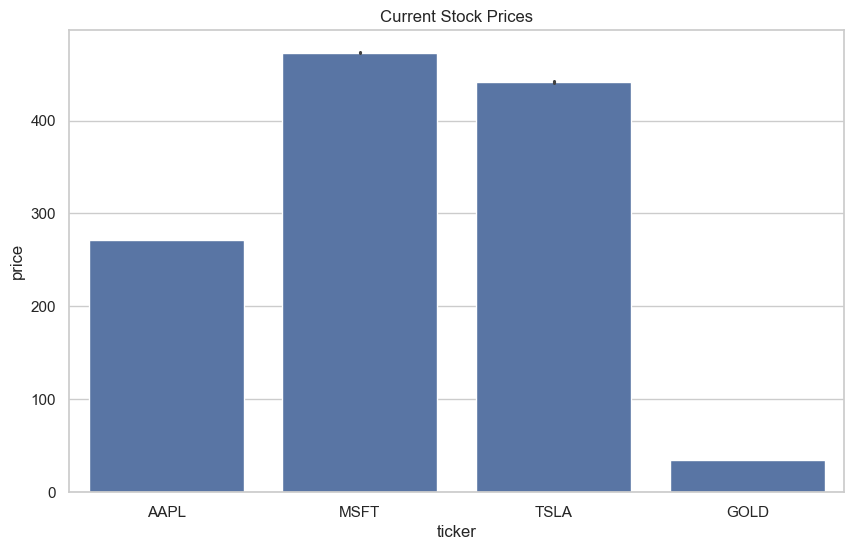

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(
    #data=df,
    data=df_stocks,
    x='ticker',
    y='price'
)
plt.title('Current Stock Prices')
plt.show()

In [35]:
df_stocks['moving_avg'] = df_stocks.groupby('ticker')["price"].rolling(window=3).mean().reset_index(level=0, drop=True)

In [36]:
df_stocks.columns

Index(['id', 'ticker', 'price', 'volume', 'timestamp', 'moving_avg'], dtype='object')

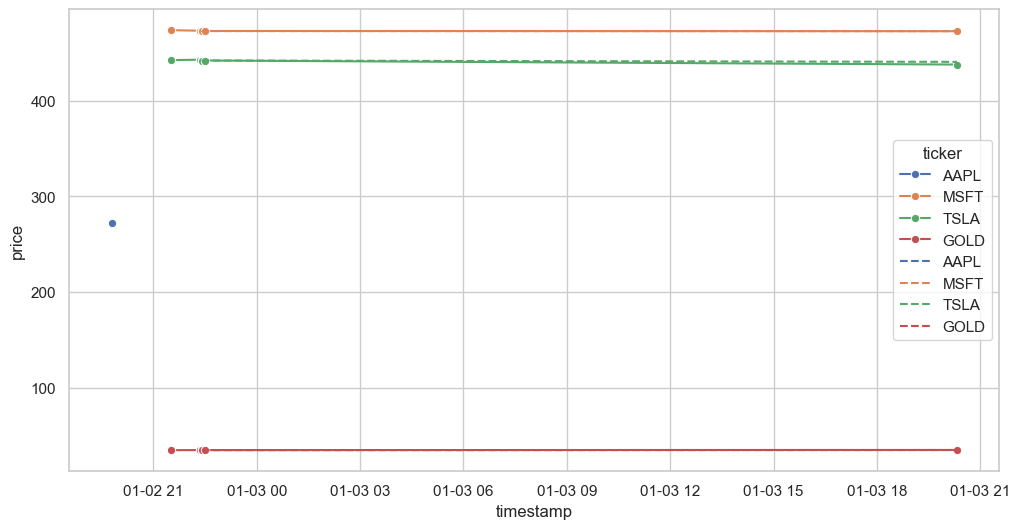

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_stocks, x='timestamp', y='price', hue='ticker', marker='o')
sns.lineplot(data=df_stocks, x='timestamp', y='moving_avg', hue='ticker', linestyle='--')

plt.show()